In [103]:
from pathlib import Path
from utils import read_input
from collections import Counter
import numpy as np
from bresenham import bresenham
from statistics import mean, median, mode
from itertools import combinations, product
from tqdm import tqdm
import pandas as pd
from rich import print
import matplotlib.pyplot as plt

In [94]:
test = Path("input/day13/test.txt")
test1 = Path("input/day13/test1.txt")
test2 = Path("input/day13/test2.txt")
data = Path("input/day13/data.txt")

In [96]:
def get_instructions(inputfile):
    raw = read_input(inputfile)
    dots = []
    instructions = []
    for line in raw:
        if line:
            if line.startswith("fold"):
                _, instr = line.split("fold along ")
                axis, index = instr.split("=")
                instructions.append((axis, int(index)))
            else:
                dots.append([int(num) for num in line.split(",")])
    return dots, instructions

In [97]:
def fold_on_y(coords, fold_index):
    new_coords = set()
        
    for x, y in coords:
        if y > fold_index:
            new_y = y - ((y - fold_index) * 2)
        else:
            new_y = y
        
        new_coords.add((x, new_y))
#         print(f"({x, y}) -> ({x, new_y})")
    return new_coords

def fold_on_x(coords, fold_index):
    new_coords = set()
        
    for x, y in coords:
        if x > fold_index:
            new_x = x - ((x - fold_index) * 2)
        else:
            new_x = x
        
        new_coords.add((new_x, y))
    return new_coords

axis_to_fold_fn = {
    "y": fold_on_y,
    "x": fold_on_x
}

In [114]:
def do_all_folds(coords, instructions):
    for axis, index in instructions:
        coords = axis_to_fold_fn[axis](coords, index)
    return coords

In [131]:
def display_coords(coords):
    all_x, all_y = list(zip(*coords))
    # flip y so display is the right way up
    ys = [-y for y in all_y]
    plt.scatter(all_x, ys)
    plt.axis('equal')
    plt.show()

In [132]:
# pt 1
coords, instructions = get_instructions(data) 
axis, fold_index = instructions[0]
len(axis_to_fold_fn[axis](coords, fold_index))

671

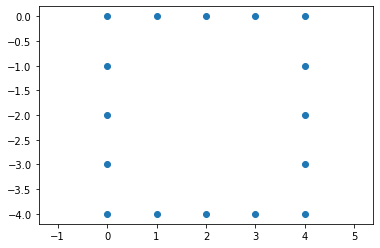

In [133]:
coords, instructions = get_instructions(test) 
new_coords = do_all_folds(coords, instructions)
display_coords(new_coords)

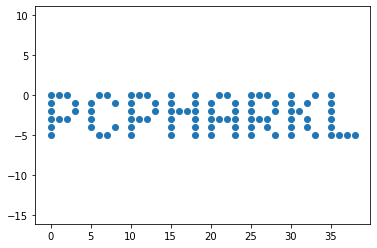

In [134]:
coords, instructions = get_instructions(data) 
new_coords = do_all_folds(coords, instructions)
display_coords(new_coords)